In [6]:
%matplotlib inline

In [7]:
from tvDatafeed import TvDatafeed,Interval

In [8]:
# get credentials for tradingview
username = 'dongjun_lee1208'
password = 'jun405034A!'

In [9]:
# initialize tradingview

tv = TvDatafeed(username=username,password=password)

In [10]:
tv.get_hist('AAPL','NASDAQ',)

,symbol,open,high,low,close,volume
datetime,,,,,,
2023-12-21 14:30:00,NASDAQ:AAPL,196.10,197.0800,193.500,194.68,46482549.0
2023-12-22 14:30:00,NASDAQ:AAPL,195.18,195.4100,192.970,193.60,37149570.0
2023-12-26 14:30:00,NASDAQ:AAPL,193.61,193.8900,192.830,193.05,28919310.0
2023-12-27 14:30:00,NASDAQ:AAPL,192.49,193.5000,191.090,193.15,48087681.0
2023-12-28 14:30:00,NASDAQ:AAPL,194.14,194.6600,193.170,193.58,34049898.0
2023-12-29 14:30:00,NASDAQ:AAPL,193.90,194.4000,191.725,192.53,42672148.0
2024-01-02 14:30:00,NASDAQ:AAPL,187.15,188.4400,183.885,185.64,82488674.0
2024-01-03 14:30:00,NASDAQ:AAPL,184.22,185.8800,183.430,184.25,58414460.0
2024-01-04 14:30:00,NASDAQ:AAPL,182.15,183.0872,180.880,181.91,71983570.0


In [37]:
nifty_data=tv.get_hist('NIFTY','NSE',interval=Interval.in_1_hour,n_bars=1000)

In [38]:
nifty_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5210 entries, 2021-01-01 03:45:00 to 2024-01-05 09:45:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  5210 non-null   object 
 1   open    5210 non-null   float64
 2   high    5210 non-null   float64
 3   low     5210 non-null   float64
 4   close   5210 non-null   float64
 5   volume  5210 non-null   float64
dtypes: float64(5), object(1)
memory usage: 284.9+ KB


<Axes: >

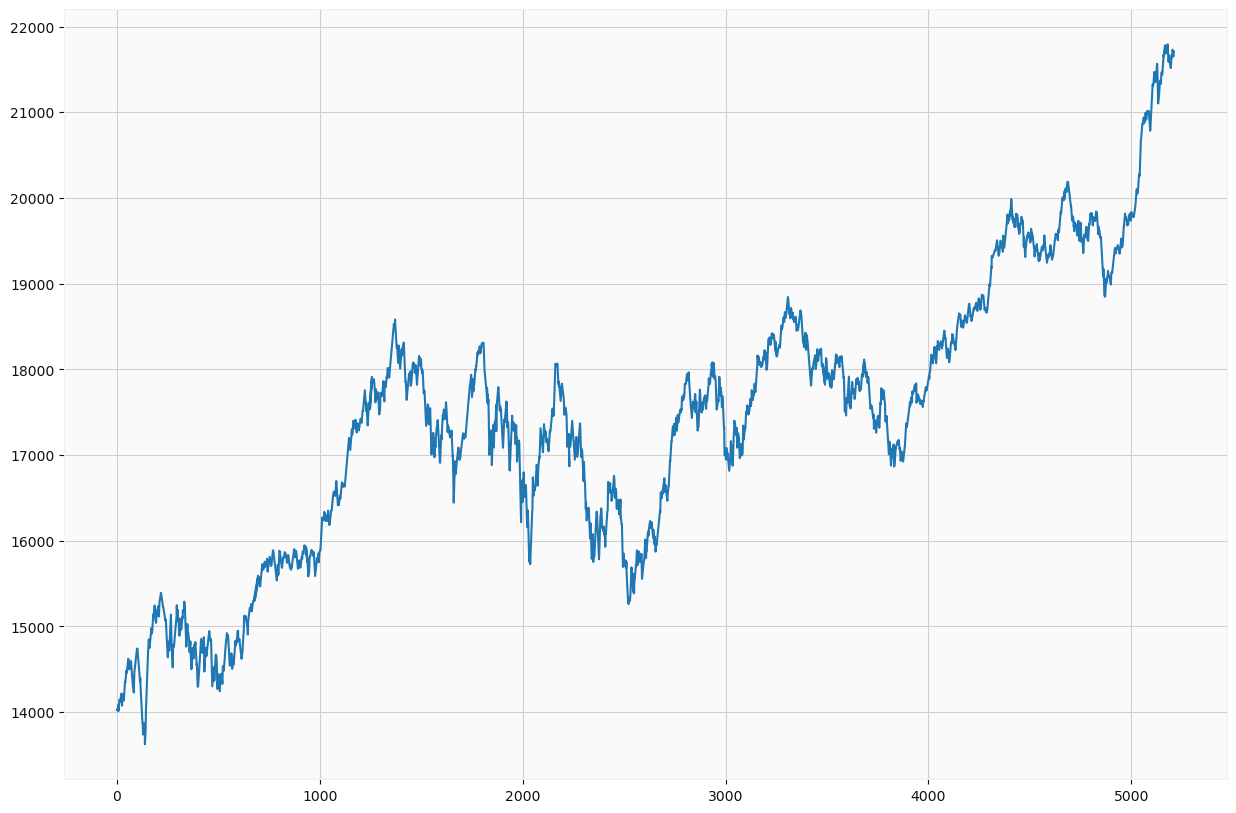

In [39]:
nifty_data.close.plot(figsize=(15,10),use_index=False)

In [14]:
# futures data
crudeoil_data=tv.get_hist('CRUDEOIL','MCX',Interval.in_2_hour,n_bars=5000,fut_contract=1)

<Axes: xlabel='datetime'>

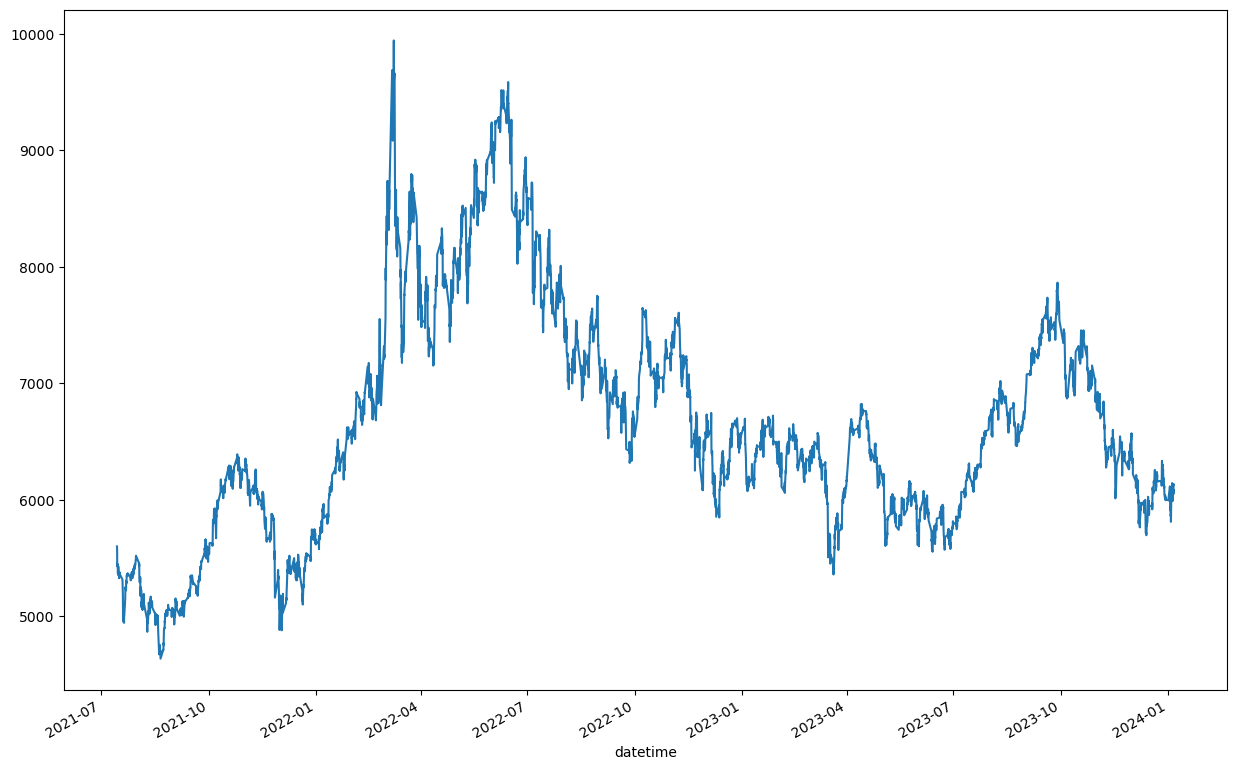

In [15]:
crudeoil_data.close.plot(figsize=(15,10))

In [16]:
# cryptocurrencies
btc_data=tv.get_hist('BTC','CME',Interval.in_1_minute,n_bars=5000,fut_contract=1)

In [17]:
btc_usd_data=tv.get_hist('BTCUSD','BINANCE',Interval.in_1_hour,n_bars=5000)

<Axes: xlabel='datetime'>

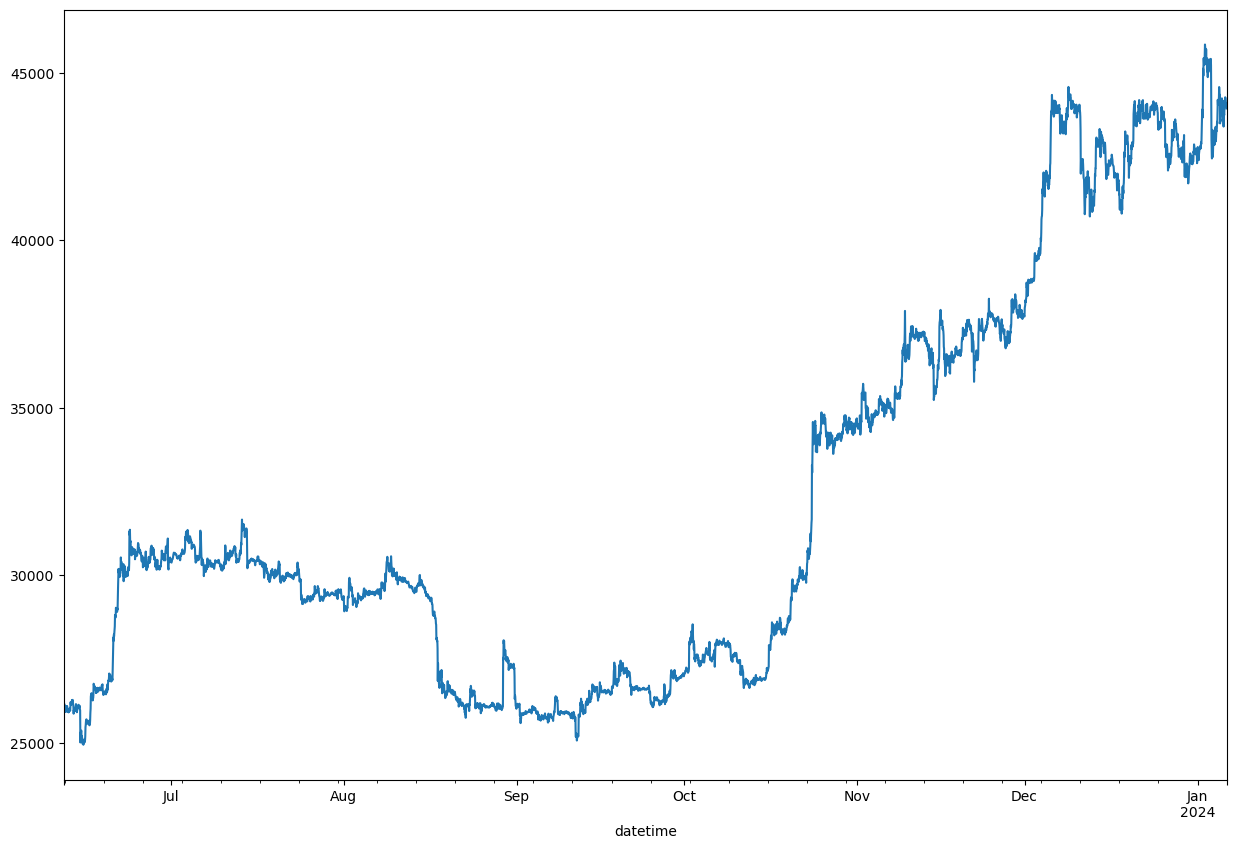

In [18]:
btc_usd_data.close.plot(figsize=(15,10))

In [32]:
etheur_data=tv.get_hist('ETHEUR','BINANCE',Interval.in_1_minute,50000)

<Axes: xlabel='datetime'>

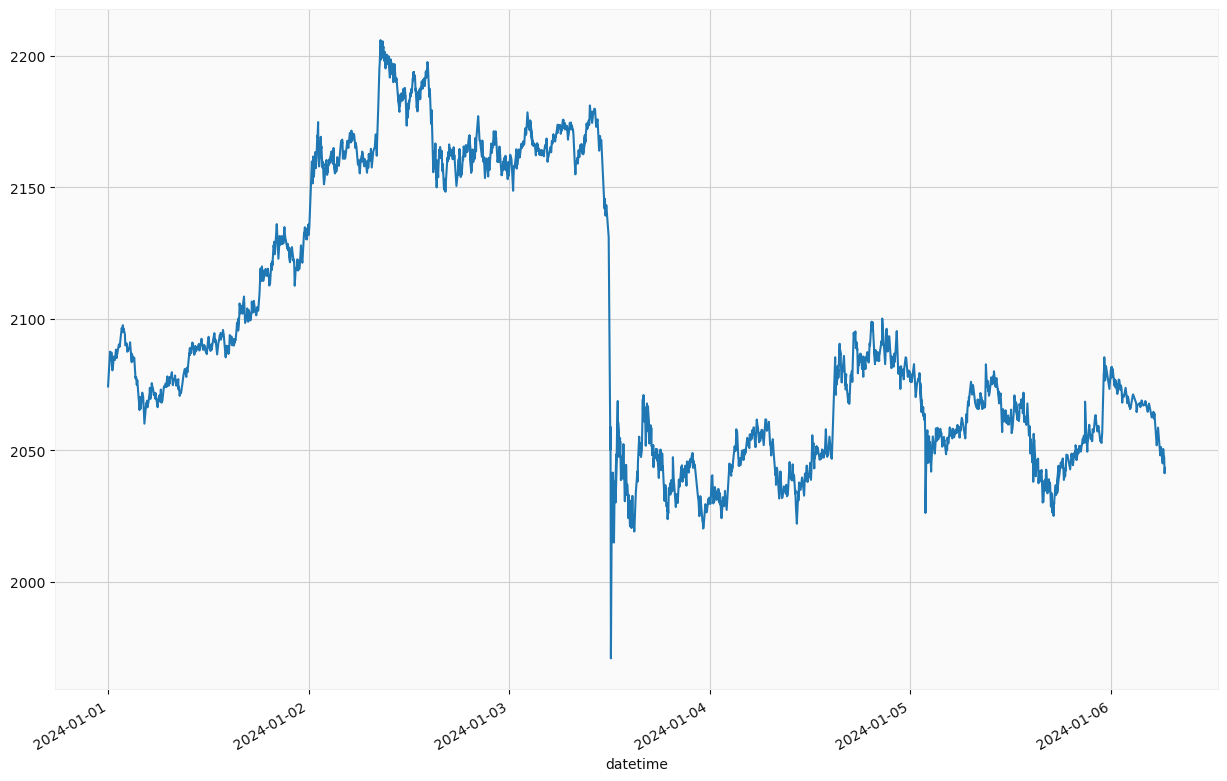

In [33]:
etheur_data.close.plot(figsize=(15,10))

In [22]:
# plotting candlesticks chart

import mplfinance as mpf

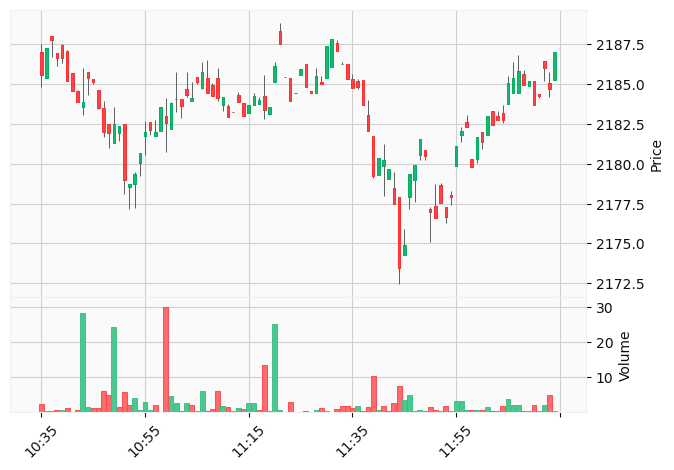

In [23]:
mpf.plot(etheur_data.head(100),type='candle',style='yahoo',volume=True)

In [25]:
etheur_data.to_csv('./data/etheur.csv')

In [28]:
tv.search_symbol(text='',exchange='binance')

[]

In [31]:
with open('./data/binance spot list.txt', 'r') as file:
    content = file.read()
    
pairs = content.split(',')
exchanges_symbols = [pair.split(':') for pair in pairs]

for exchange, symbol in exchanges_symbols:
    btc_usd_data=tv.get_hist(symbol,exchange,Interval.in_1_hour,n_bars=50000)

KeyboardInterrupt: 